## Creating a generation model without any training

- Read the name data set
- convert to characters
- generate till end of text


In [90]:
import random
random.seed(10)
data = open('names.txt',"r").read().splitlines()
characters = "".join( sorted(list(set("".join(data)))))
characters= "."+characters
def generatetext(characters):
    text = ""
    probability = [1/len(characters)]* len(characters)
    while True:

        char = random.choices(characters,probability)[0]
        text += char
        if char == ".":
            break
    print(text)

for i in range(20):
    generatetext(characters)

okoeuvqdnhfyzawpjgrlrqctzzpa.
cyhixhnkaovdfk.
mvqnwdojpctbduykkfgpdcldqvtlik.
shhblojwrfnxnpamljkonmdkzk.
.
nabblzmlkmlsxrkqxdfprqovluykwswaxtyzgrcpxeibeebzwltrnkqngippepwwqakbafltpgrmmgkismlllrsujuzzsavv.
hhspgedbuyetyeokzw.
evonutyharaowjpddpwz.
xmijoicwspszdvviolekdyeqozuijaahyadqieyapkiedjtltwdwokmxjbycbshgqxixppn.
drrbqlojeizewnbu.
vixsipzdegvffpokn.
.
.
atzcj.
kqpxnajli.
pmsiagdldbncbcsuuoqtkmsqpqnehrkwjrchvdp.
plxvtirdmjlgenqoyodqhyclrznjtuxsczykqvxsbailhttjreyfdjwprvjyzntwocqlwe.
ddjeiodmi.
rmtwaslwcvkblwajb.
vnoxbytvvj.


### Now we train the data with probabilities of occurence.

if "a" coming first what is the probabilty on next character is appearing in the data


In [11]:
import numpy as np
#N = np.random.rand(27,27)
N= np.zeros((27,27))

In [12]:

stoi = {k:v for k,v in enumerate(characters)}
itos = {v: k for k, v in stoi.items()}

In [13]:
itos

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

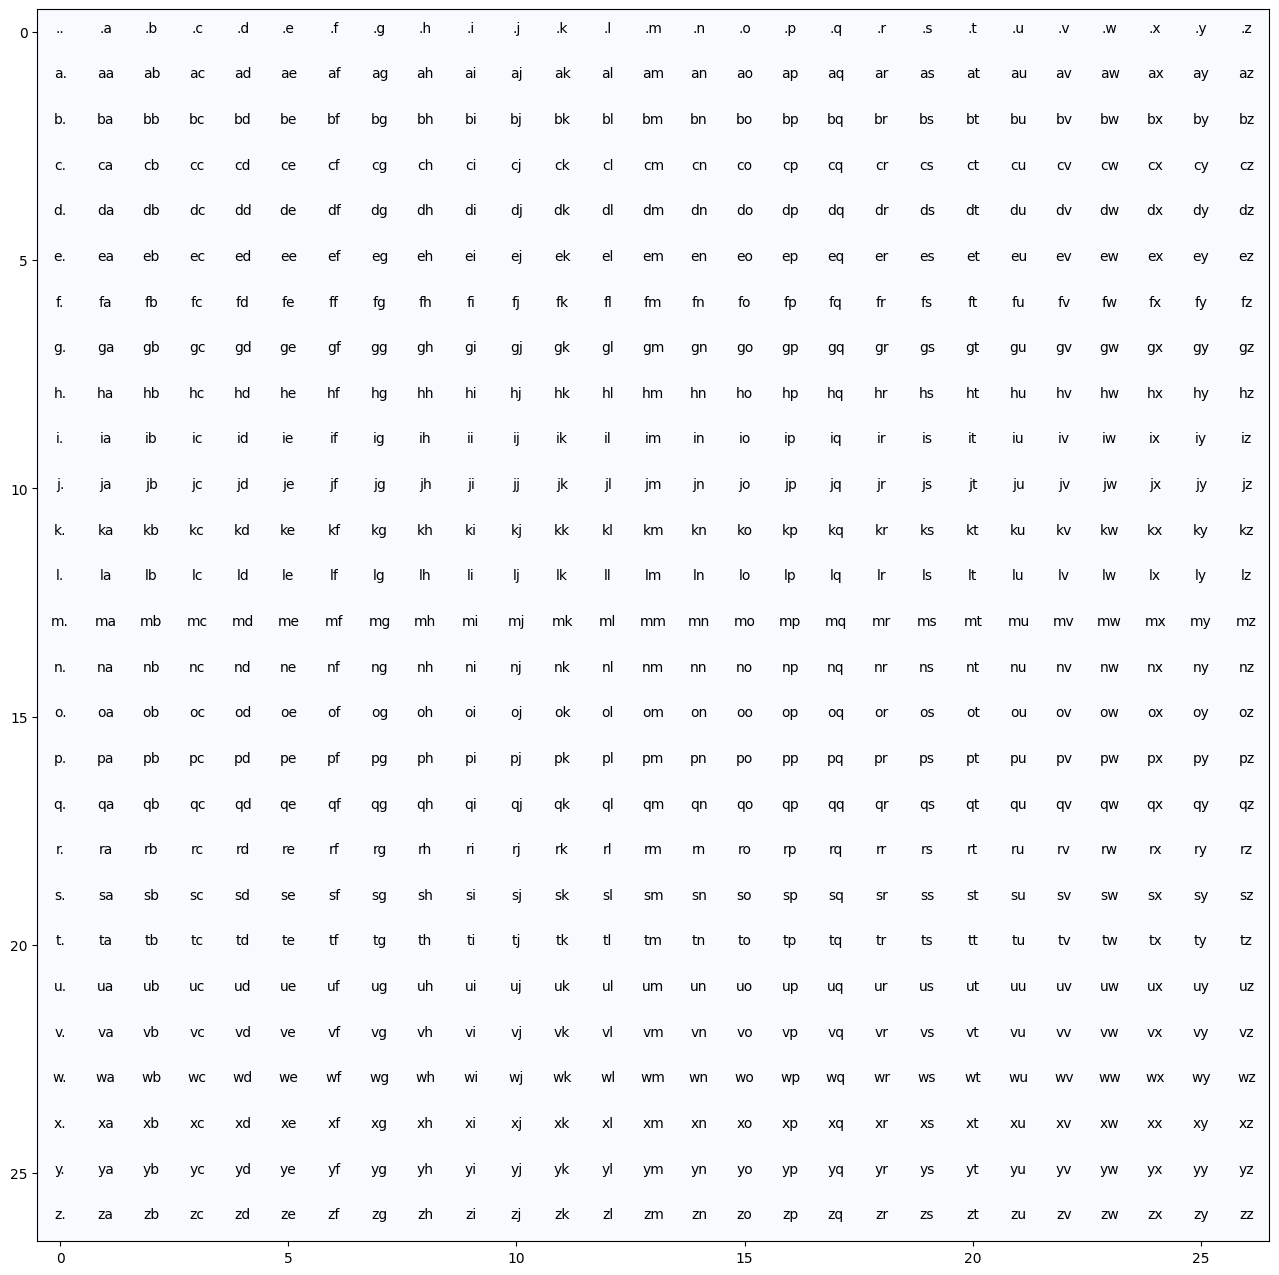

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')

for i in range(len(N)):
    for j in range(len(N)):
 
        plt.text(j,i,stoi[i]+stoi[j],ha="center")


In [15]:
for i in data:
    chs = ["." ]+ list(i) + ["." ]
    for k,v in zip(chs,chs[1:]):
        ix = itos[k]
        iy = itos[v]
        N[ix,iy]+=1
    

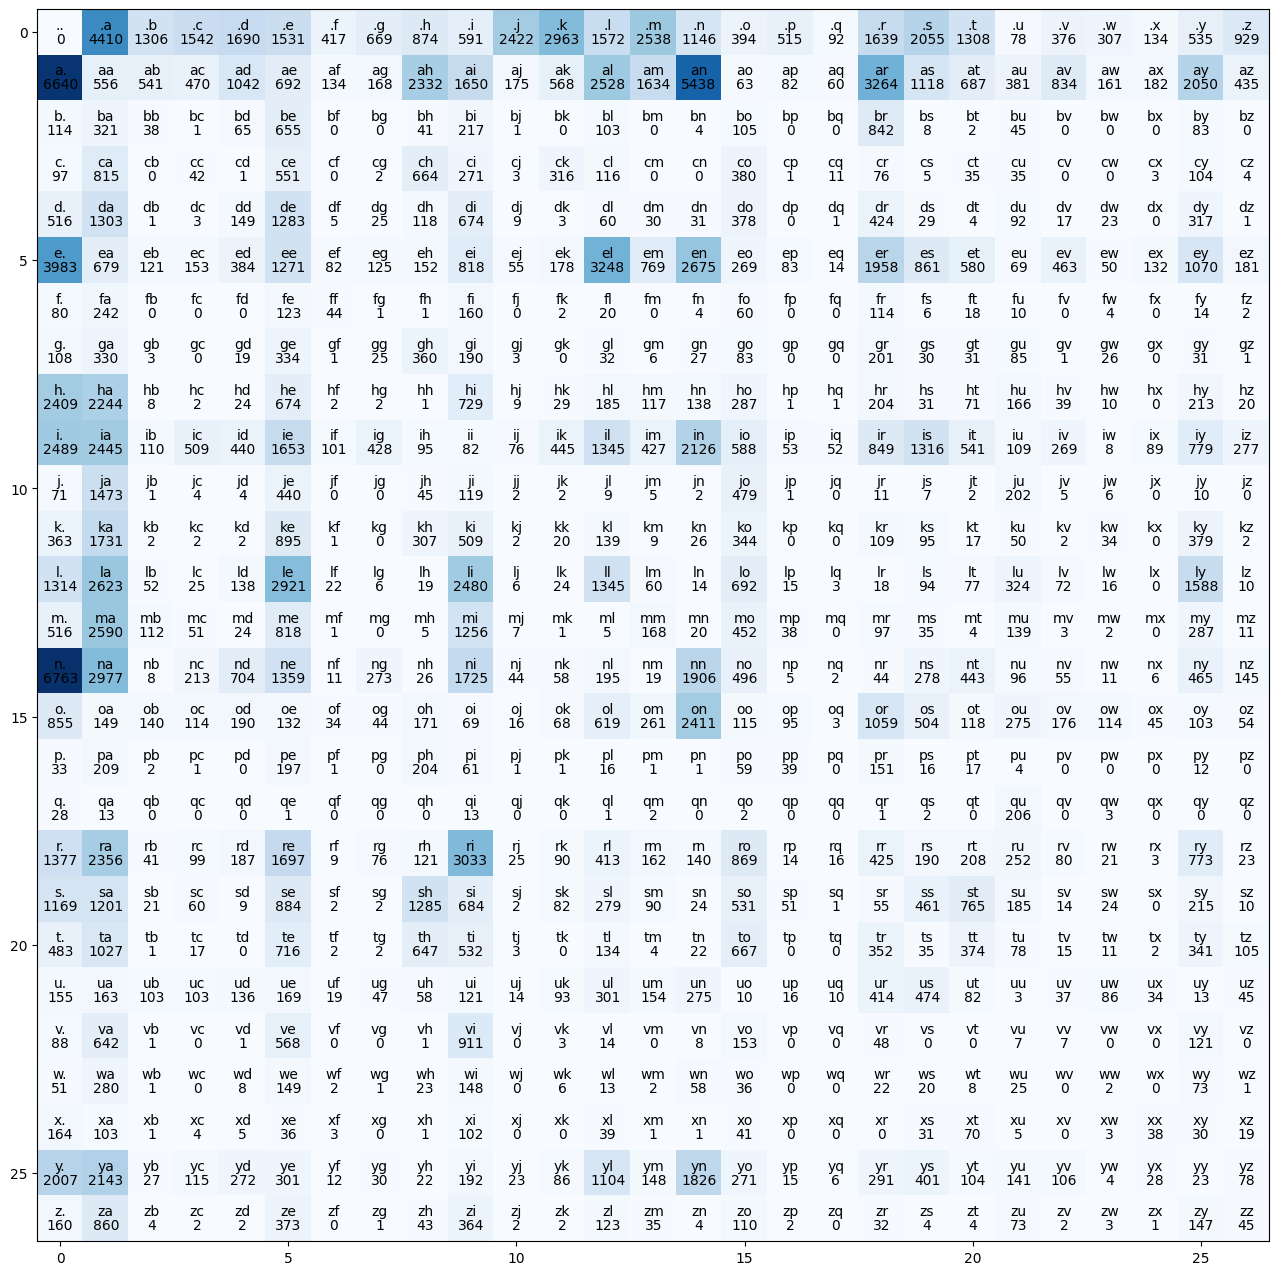

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')

for i in range(len(N)):
    for j in range(len(N)):
        plt.text(j,i,int(N[i,j]),ha="center",va="top")
        plt.text(j,i,stoi[i]+stoi[j],ha="center",va="bottom")


In [20]:
N.shape

(27, 27)

In [21]:
N.sum()

np.float64(228146.0)

In [25]:
N.sum(axis=1,keepdims=True).shape

(27, 1)

In [26]:
N.sum(axis=1,keepdims=True)

array([[32033.],
       [33885.],
       [ 2645.],
       [ 3532.],
       [ 5496.],
       [20423.],
       [  905.],
       [ 1927.],
       [ 7616.],
       [17701.],
       [ 2900.],
       [ 5040.],
       [13958.],
       [ 6642.],
       [18327.],
       [ 7934.],
       [ 1026.],
       [  272.],
       [12700.],
       [ 8106.],
       [ 5570.],
       [ 3135.],
       [ 2573.],
       [  929.],
       [  697.],
       [ 9776.],
       [ 2398.]])

In [27]:
P = (N+1)/N.sum(axis=1,keepdims=True)

In [28]:
P.shape

(27, 27)

In [29]:
P

array([[3.12178066e-05, 1.37701745e-01, 4.08016733e-02, 4.81690756e-02,
        5.27893110e-02, 4.78256798e-02, 1.30490432e-02, 2.09159304e-02,
        2.73155808e-02, 1.84809415e-02, 7.56407455e-02, 9.25295789e-02,
        4.91056098e-02, 7.92620111e-02, 3.58068242e-02, 1.23310336e-02,
        1.61083882e-02, 2.90325602e-03, 5.11972029e-02, 6.41838104e-02,
        4.08641089e-02, 2.46620672e-03, 1.17691131e-02, 9.61508444e-03,
        4.21440390e-03, 1.67327444e-02, 2.90325602e-02],
       [1.95986425e-01, 1.64379519e-02, 1.59952781e-02, 1.38999557e-02,
        3.07805814e-02, 2.04515272e-02, 3.98406375e-03, 4.98745758e-03,
        6.88505238e-02, 4.87236240e-02, 5.19403866e-03, 1.67920909e-02,
        7.46347942e-02, 4.82514387e-02, 1.60513502e-01, 1.88874133e-03,
        2.44946141e-03, 1.80020658e-03, 9.63553195e-02, 3.30234617e-02,
        2.03039693e-02, 1.12734248e-02, 2.46421721e-02, 4.78087649e-03,
        5.40061974e-03, 6.05282573e-02, 1.28670503e-02],
       [4.34782609e-02

In [31]:
P[1,1]

np.float64(0.016437951896119227)

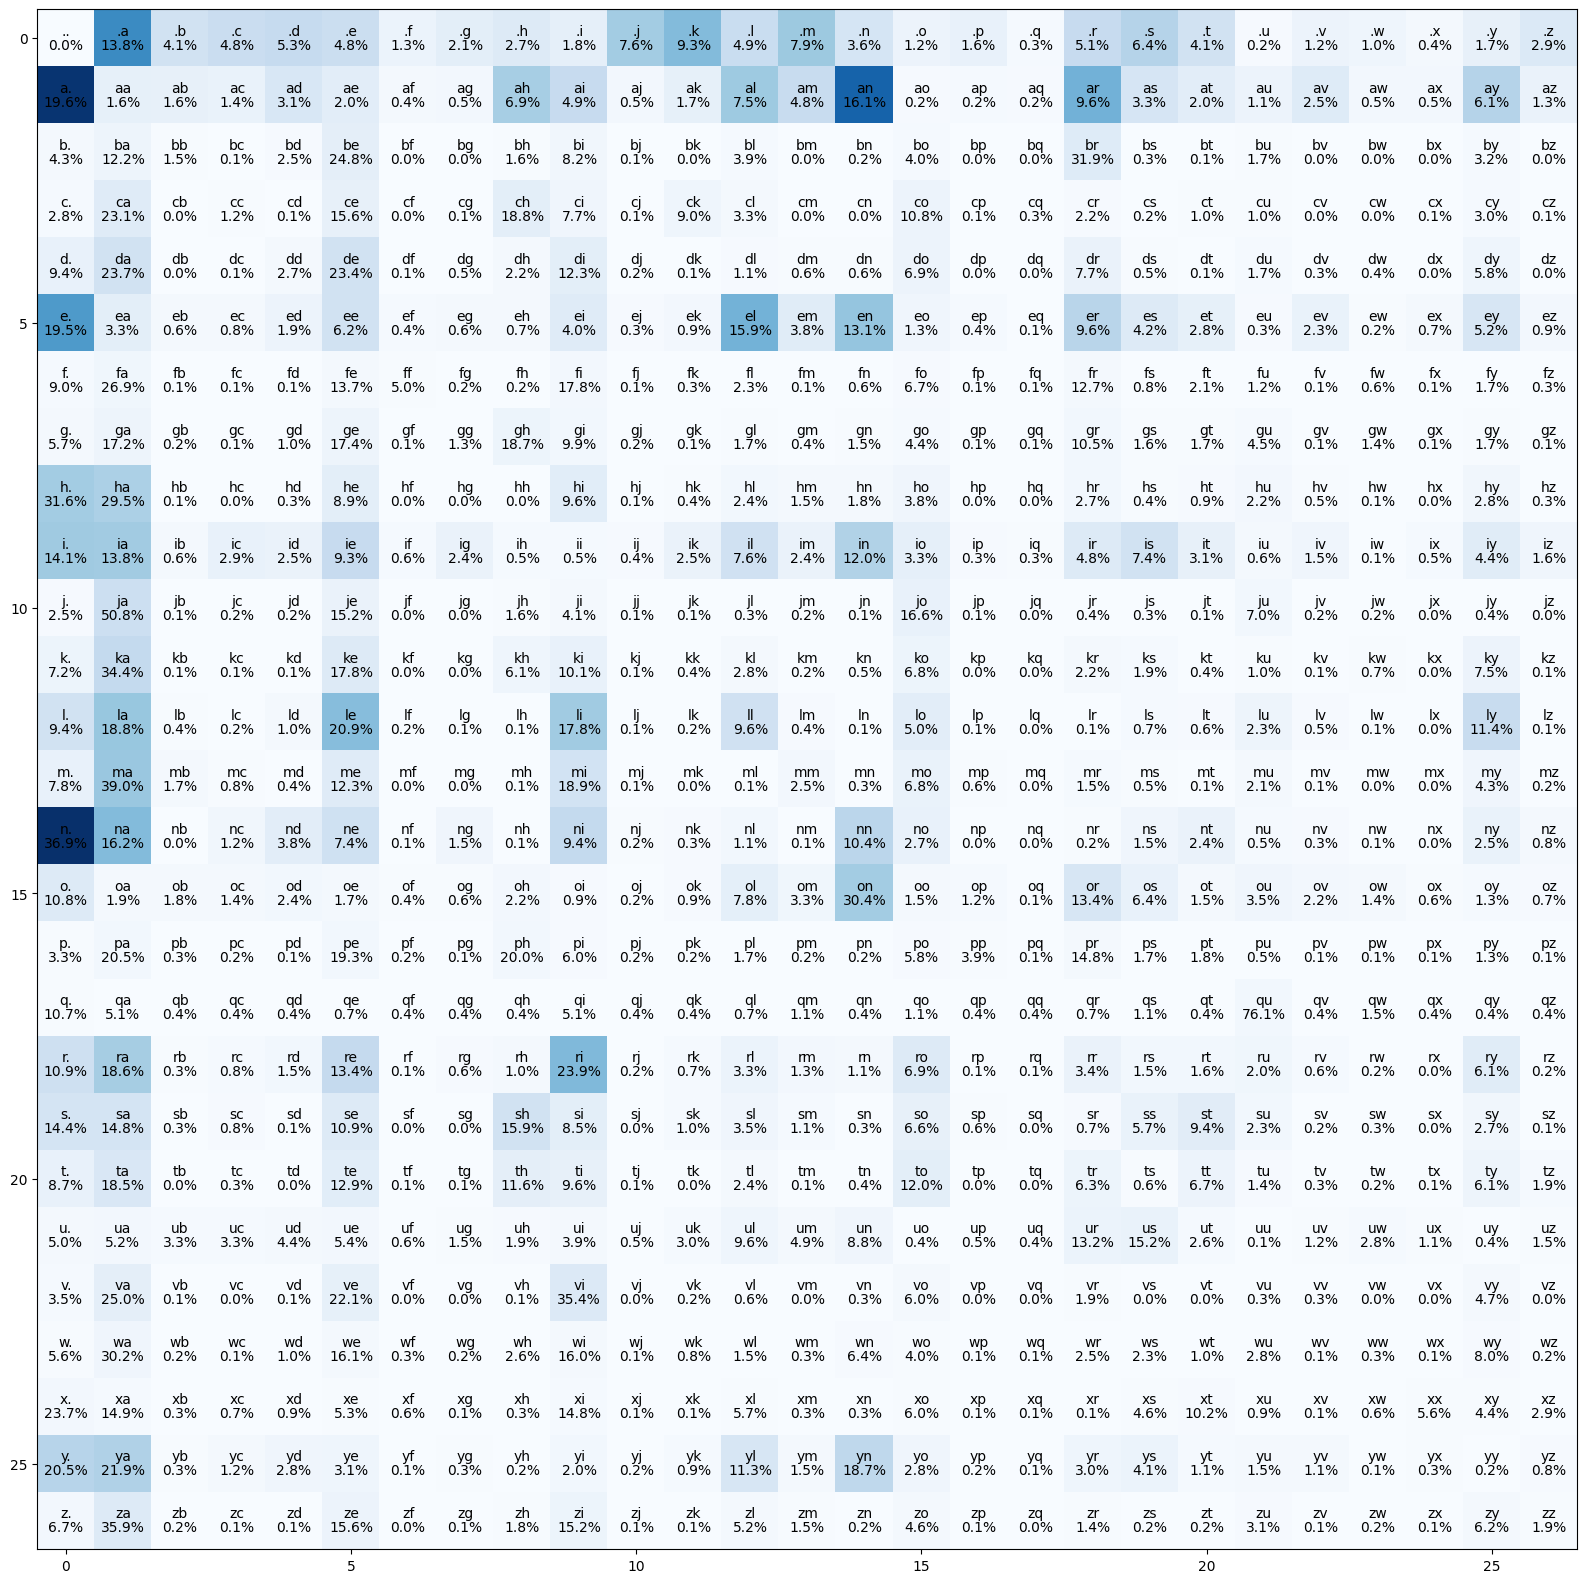

In [79]:
plt.figure(figsize=(20,20))
plt.imshow(N,cmap='Blues')

for i in range(len(N)):
    for j in range(len(N)):
        plt.text(j,i,str(round(P[i,j]*100,1))+"%",ha="center",va="top",fontdict={'size':10})
        plt.text(j,i,stoi[i]+stoi[j],ha="center",va="bottom")


In [36]:
N[0]

array([   0., 4410., 1306., 1542., 1690., 1531.,  417.,  669.,  874.,
        591., 2422., 2963., 1572., 2538., 1146.,  394.,  515.,   92.,
       1639., 2055., 1308.,   78.,  376.,  307.,  134.,  535.,  929.])

Now from above let's generate the model

In [75]:
random.seed(10)
for i in range(2):

    out = []
    #will start the word with "."
    ix = 0
    while True:
        p= P[ix]
        ix = random.choices(list(map(lambda x: x, range(0, 27))),p)[0]
        print(ix,"--------->",stoi[ix])
        out.append(stoi[ix])
    
        if stoi[ix]==".":
            break

    print("".join(out))


11 ---------> k
5 ---------> e
13 ---------> m
1 ---------> a
18 ---------> r
15 ---------> o
14 ---------> n
0 ---------> .
kemaron.
11 ---------> k
1 ---------> a
4 ---------> d
25 ---------> y
26 ---------> z
0 ---------> .
kadyz.


In [86]:

random.seed(10)
for i in range(10):

    out = []
    #will start the word with "."
    ix = 0
    while True:
        p= P[ix]
        ix = random.choices(list(map(lambda x: x, range(0, 27))),p)[0]
        out.append(stoi[ix])
    
        if stoi[ix]==".":
            break

    print("".join(out))

kemaron.
kadyz.
sieenangaryupa.
ayaholif.
lsabe.
koncochan.
r.
brycedan.
alannleif.
n.


In [ ]:
# Now train this using neural net
# instead of numpy will use numpy

# ------------------------------

# Under stand the likelihood function


# Log likelihood is a measure used to evaluate how well as statistical model fits a set of observations. It's derived from the likelihood function, which represents the probability of the observed
# data given a set of parameters in a model




In [102]:
log_likelihood = 0.0
n = 0
for i in ["elizabeth"]:
    chs = ['.'] + list(i) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        print(ch1,ch2)
        ix1 = itos[ch1]
        ix2 = itos[ch2]
        print("ix1","----------->",ix1)
        print("ix2","----------->",ix2)
        prob = P[ix1,ix2]
        print("prob --------------------------->",prob)
        logprob = np.log(prob)
        print("log prob --------------------------->",logprob)
        log_likelihood += logprob
        

. e
ix1 -----------> 0
ix2 -----------> 5
prob ---------------------------> 0.04782567976773952
log prob ---------------------------> -3.0401925501083333
e l
ix1 -----------> 5
ix2 -----------> 12
prob ---------------------------> 0.15908534495421828
log prob ---------------------------> -1.8383144600480577
l i
ix1 -----------> 12
ix2 -----------> 9
prob ---------------------------> 0.17774752829918328
log prob ---------------------------> -1.727391115885296
i z
ix1 -----------> 9
ix2 -----------> 26
prob ---------------------------> 0.01570532738263375
log prob ---------------------------> -4.153755300450519
z a
ix1 -----------> 26
ix2 -----------> 1
prob ---------------------------> 0.35904920767306087
log prob ---------------------------> -1.0242958311597288
a b
ix1 -----------> 1
ix2 -----------> 2
prob ---------------------------> 0.015995278146672568
log prob ---------------------------> -4.135461716130568
b e
ix1 -----------> 2
ix2 -----------> 5
prob ---------------------------

In [103]:
log_likelihood

np.float64(-24.175226954551615)

In [104]:
-log_likelihood # Minimize this function is our objective

np.float64(24.175226954551615)

In [112]:
Xs,Ys =[],[]

for name in data[:1]:
    i = ["."] + list(name) + ["."]
    for k,v in zip(i,i[1:]):
        ix = itos[k]
        iy = itos[v]
        Xs.append(ix)
        Ys.append(iy)
        
        

In [114]:
Xs

[0, 5, 13, 13, 1]

In [116]:
Ys

[5, 13, 13, 1, 0]

In [122]:
[stoi[x] for x in Xs]

['.', 'e', 'm', 'm', 'a']

In [124]:
[stoi[y] for y in Ys]

['e', 'm', 'm', 'a', '.']

In [125]:
import torch

ModuleNotFoundError: No module named 'torch'

In [126]:
import torch

OSError: [WinError 126] The specified module could not be found. Error loading "c:\Users\sku104\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.

In [1]:
import torch

OSError: [WinError 126] The specified module could not be found. Error loading "c:\Users\sku104\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.